In [16]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

In [2]:
fpr_1 = np.load('fpr_1.npy')
tpr_1 = np.load('tpr_1.npy')

fpr_2 = np.load('fpr_2.npy')
tpr_2 = np.load('tpr_2.npy')

fpr_3 = np.load('fpr_3.npy')
tpr_3 = np.load('tpr_3.npy')

fpr_4 = np.load('fpr_4.npy')
tpr_4 = np.load('tpr_4.npy')

fpr_5 = np.load('fpr_5.npy')
tpr_5 = np.load('tpr_5.npy')

fpr_6 = np.load('fpr_6.npy')
tpr_6 = np.load('tpr_6.npy')

fpr_7 = np.load('fpr_7.npy')
tpr_7 = np.load('tpr_7.npy')

fpr_8 = np.load('fpr_8.npy')
tpr_8 = np.load('tpr_8.npy')

fpr_9 = np.load('fpr_9.npy')
tpr_9 = np.load('tpr_9.npy')

fpr_10 = np.load('fpr_10.npy')
tpr_10 = np.load('tpr_10.npy')

In [15]:
fpr_1 = pd.DataFrame(fpr_1) # 162rows
tpr_1 = pd.DataFrame(tpr_1) # 162rows

fpr_2 = pd.DataFrame(fpr_2) # 152rows
tpr_2 = pd.DataFrame(tpr_2) # 152rows

fpr_3 = pd.DataFrame(fpr_3) # 176rows
tpr_3 = pd.DataFrame(tpr_3) # 176rows

fpr_4 = pd.DataFrame(fpr_4) # 142rows
tpr_4 = pd.DataFrame(tpr_4) # 142rows

fpr_5 = pd.DataFrame(fpr_5) # 154rows
tpr_5 = pd.DataFrame(tpr_5) # 154rows

fpr_6 = pd.DataFrame(fpr_6) # 166rows
tpr_6 = pd.DataFrame(tpr_6) # 166rows

fpr_7 = pd.DataFrame(fpr_7) # 160rows
tpr_7 = pd.DataFrame(tpr_7) # 160rows

fpr_8 = pd.DataFrame(fpr_8) # 160rows
tpr_8 = pd.DataFrame(tpr_8) # 160rows

fpr_9 = pd.DataFrame(fpr_9) # 165rows
tpr_9 = pd.DataFrame(tpr_9) # 165rows

fpr_10 = pd.DataFrame(fpr_10) # 168rows
tpr_10 = pd.DataFrame(tpr_10) # 168rows

In [3]:
fpr_list = [fpr_1, fpr_2, fpr_3, fpr_4, fpr_5, fpr_6, fpr_7, fpr_8, fpr_9, fpr_10]
tpr_list = [tpr_1, tpr_2, tpr_3, tpr_4, tpr_5, tpr_6, tpr_7, tpr_8, tpr_9, tpr_10]

In [4]:
# 1. 找到最长的 fpr 的长度
max_length = max(len(fpr) for fpr in fpr_list)

In [5]:
# 2. 插值对齐
interpolated_fprs = []
for fpr in fpr_list:
    # 创建插值函数
    x_orig = np.linspace(0, 1, len(fpr))  # 原始 x 值
    f = interpolate.interp1d(x_orig, fpr, kind='linear')  # 线性插值
    # 插值到 max_length
    x_new = np.linspace(0, 1, max_length)
    interpolated_fpr = f(x_new)
    interpolated_fprs.append(interpolated_fpr)

# 3. 计算平均 fpr
average_fpr = np.mean(interpolated_fprs, axis=0)

In [6]:
average_fpr

array([0.00000000e+00, 0.00000000e+00, 4.79375697e-04, 5.05382907e-03,
       7.92837439e-03, 1.12385974e-02, 1.42436670e-02, 1.78337361e-02,
       2.14866261e-02, 2.45958548e-02, 2.80586546e-02, 3.15372409e-02,
       3.41972024e-02, 3.80778589e-02, 4.20538860e-02, 4.53942175e-02,
       4.77985825e-02, 5.20819601e-02, 5.39691917e-02, 5.97194216e-02,
       6.33958288e-02, 6.72910513e-02, 7.16066532e-02, 7.85606523e-02,
       8.49285127e-02, 8.78943600e-02, 9.43340738e-02, 9.77799478e-02,
       1.01707232e-01, 1.07167281e-01, 1.09793391e-01, 1.13614319e-01,
       1.18069721e-01, 1.23832646e-01, 1.33810919e-01, 1.38394405e-01,
       1.44634508e-01, 1.50212468e-01, 1.60644728e-01, 1.70336401e-01,
       1.77862543e-01, 1.84607980e-01, 1.89632839e-01, 1.94820448e-01,
       2.00161202e-01, 2.06707272e-01, 2.12884717e-01, 2.22536354e-01,
       2.28734793e-01, 2.38765227e-01, 2.49565055e-01, 2.68682795e-01,
       2.76292182e-01, 2.93300865e-01, 3.06969786e-01, 3.28122126e-01,
      

In [8]:
average_fpr = pd.DataFrame(average_fpr)
average_fpr

,0
0,0.000000
1,0.000000
2,0.000000
3,0.001352
4,0.001842
...,...
171,0.624681
172,0.666283
173,0.777740
174,0.796411


In [7]:
# 1. 找到最长的 tpr 的长度
max_length_ = max(len(tpr) for tpr in tpr_list)

In [10]:
# 2. 插值对齐
interpolated_tprs = []
for tpr in tpr_list:
    # 创建插值函数
    x_orig = np.linspace(0, 1, len(tpr))  # 原始 x 值
    f = interpolate.interp1d(x_orig, tpr, kind='linear')  # 线性插值
    # 插值到 max_length
    x_new = np.linspace(0, 1, max_length_)
    interpolated_tpr = f(x_new)
    interpolated_tprs.append(interpolated_tpr)

# 3. 计算平均 fpr
average_tpr = np.mean(interpolated_tprs, axis=0)

In [11]:
average_tpr

array([0.        , 0.0062161 , 0.13037554, 0.2154572 , 0.33439299,
       0.39859223, 0.43199937, 0.4499109 , 0.47130834, 0.50235408,
       0.5139447 , 0.5297999 , 0.56313218, 0.57807574, 0.6081677 ,
       0.62861851, 0.65809747, 0.6637114 , 0.69947546, 0.72149883,
       0.73363523, 0.7402757 , 0.74857383, 0.75837422, 0.7642269 ,
       0.77212688, 0.77824394, 0.78281115, 0.79228474, 0.79904385,
       0.81110311, 0.82189024, 0.82987297, 0.84225455, 0.8529154 ,
       0.86078453, 0.86669555, 0.87272229, 0.87749416, 0.88195282,
       0.88829676, 0.89275126, 0.89795026, 0.90260308, 0.90911025,
       0.91389628, 0.92072708, 0.92422072, 0.93025552, 0.93407172,
       0.93980055, 0.94321925, 0.9498519 , 0.95466551, 0.96038539,
       0.96360455, 0.96931304, 0.97307424, 0.97581745, 0.98047457,
       0.9826681 , 0.98767717, 0.99277738, 0.99483534, 1.        ,
       1.        ])

In [12]:
average_tpr = pd.DataFrame(average_tpr)
average_tpr

,0
0,0.000000
1,0.001679
2,0.172004
3,0.210866
4,0.279475
...,...
171,0.996830
172,0.997825
173,0.998311
174,0.999827


In [13]:
from sklearn.metrics import roc_curve,precision_recall_curve,auc

In [14]:
auc(average_fpr, average_tpr)

0.96311526784163

In [40]:
average_tpr.to_csv('csv/tpr/average_tpr.csv', index=False, header=False)

In [34]:
def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
   """
   绘制十折交叉验证的ROC曲线，并将所有曲线和平均曲线绘制在一张图中。

   Args:
       fprs: 包含每一折的fpr列表 (list of numpy arrays)。
       tprs: 包含每一折的tpr列表 (list of numpy arrays)。
       average_fpr: 十折交叉验证的平均fpr (numpy array)。
       average_tpr: 十折交叉验证的平均tpr (numpy array)。
       title: 图的标题 (string)。
   """

   plt.figure(figsize=(10, 8))  # Adjust figure size as needed

   # 绘制每一折的ROC曲线
   for i in range(len(fprs)):
       roc_auc = auc(fprs[i], tprs[i])
       plt.plot(fprs[i], tprs[i], lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

   # 绘制平均ROC曲线
   average_roc_auc = auc(average_fpr, average_tpr)
   plt.plot(average_fpr, average_tpr, color='b', label=f'Average ROC (AUC = {average_roc_auc:.4f})', lw=2)

   # 绘制对角线
   plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

   # 设置图的属性
   plt.xlim([-0.05, 1.05])
   plt.ylim([-0.05, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title)
   plt.legend(loc="lower right")
   plt.grid(True)  # Add grid for better readability
   plt.savefig('1.png',dpi=600, bbox_inches='tight', pad_inches=0.1)

   plt.show()

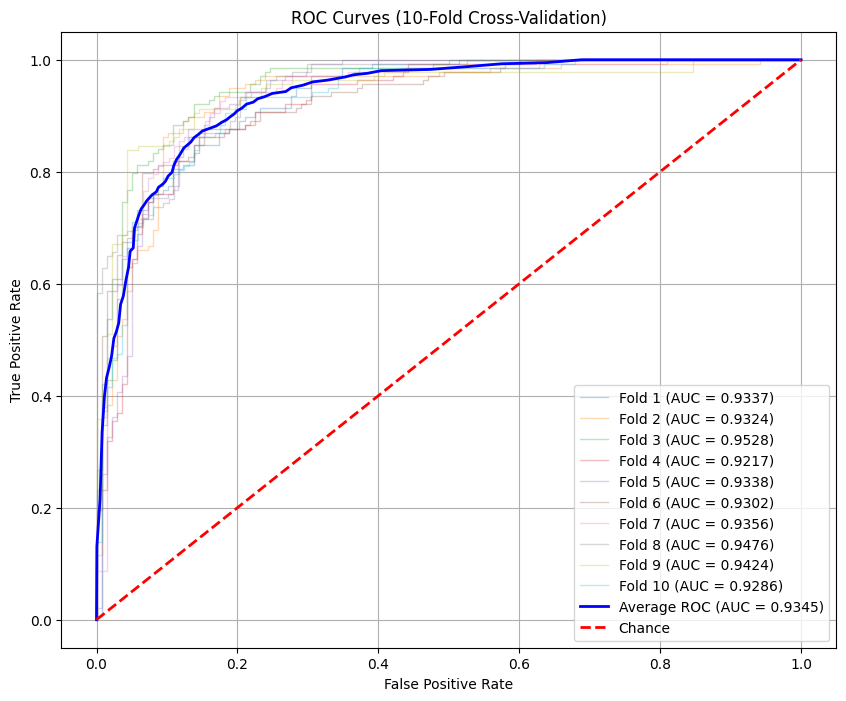

In [35]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from scipy.interpolate import interp1d

def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
   """
   绘制十折交叉验证的ROC曲线，并将所有曲线和平均曲线绘制在一张图中。

   Args:
       fprs: 包含每一折的fpr列表 (list of numpy arrays)。
       tprs: 包含每一折的tpr列表 (list of numpy arrays)。
       average_fpr: 十折交叉验证的平均fpr (numpy array)。
       average_tpr: 十折交叉验证的平均tpr (numpy array)。
       title: 图的标题 (string)。
   """

   plt.figure(figsize=(10, 8))  # Adjust figure size as needed

   # 1. 找到最长折叠的长度
   max_len = max(len(fpr) for fpr in fprs)

   # 2. 对每一折进行插值
   fprs_interp = []
   tprs_interp = []
   fpr_new = np.linspace(0, 1, max_len)  # 生成新的FPR值，长度为max_len

   for i in range(len(fprs)):
       roc_auc = auc(fprs[i], tprs[i])

       # 插值到新的FPR值
       f = interp1d(fprs[i], tprs[i], kind='linear', fill_value="extrapolate")  # 使用线性插值
       tpr_new = f(fpr_new)

       # 使用移动平均平滑TPR
       window_size = 5  # 移动平均窗口大小，可以调整
       tpr_smooth = moving_average(tpr_new, window_size)

       fprs_interp.append(fpr_new)
       tprs_interp.append(tpr_smooth)

       plt.plot(fpr_new, tpr_smooth, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

   # 绘制平均ROC曲线
   average_roc_auc = auc(average_fpr, average_tpr)
   # 对平均ROC曲线进行插值
   f_avg = interp1d(average_fpr, average_tpr, kind='linear', fill_value="extrapolate")
   tpr_avg_new = f_avg(fpr_new)
   tpr_avg_smooth = moving_average(tpr_avg_new, window_size)
   plt.plot(fpr_new, tpr_avg_smooth, color='b', label=f'Average ROC (AUC = {average_roc_auc:.4f})', lw=2)

   # 绘制对角线
   plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

   # 设置图的属性
   plt.xlim([-0.05, 1.05])
   plt.ylim([-0.05, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title)
   plt.legend(loc="lower right")
   plt.grid(True)  # Add grid for better readability
   plt.savefig('1.png',dpi=600, bbox_inches='tight', pad_inches=0.1)

   plt.show()


def moving_average(data, window_size):
   """
   使用移动平均平滑数据。

   Args:
       data: 要平滑的数据 (numpy array)。
       window_size: 移动平均窗口大小 (int)。

   Returns:
       平滑后的数据 (numpy array)。
   """
   if len(data) < window_size:
       return data  # 数据太短，无法进行移动平均
   window = np.ones(window_size) / window_size
   data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge') # 使用边缘值填充
   return np.convolve(data_padded, window, mode='valid')

D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: divide by zero encountered i

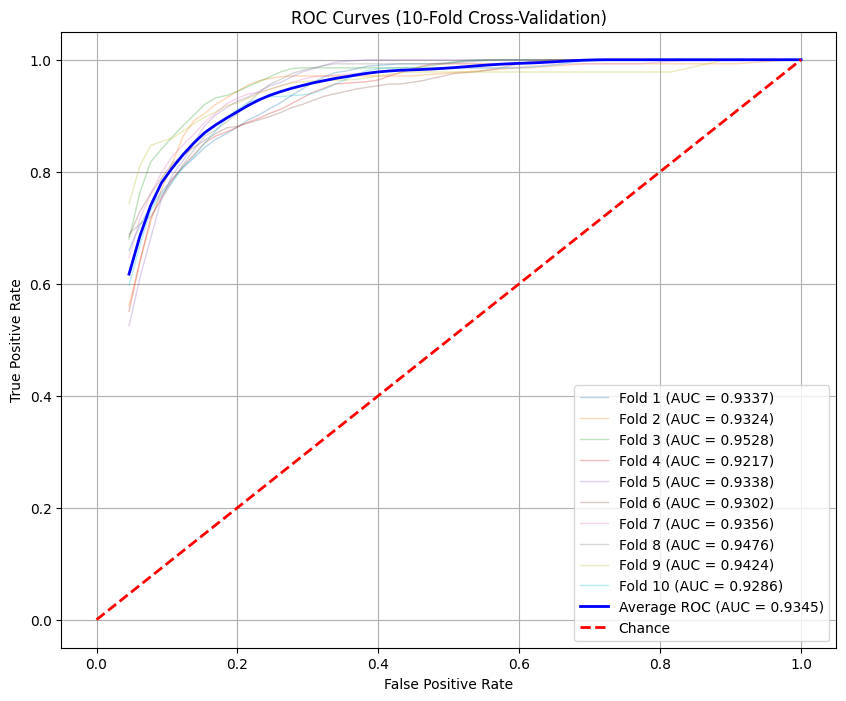

In [39]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    for i in range(len(fprs)):
        if fprs[i][0] > 0:
            fprs[i] = np.insert(fprs[i], 0, 0)
            tprs[i] = np.insert(tprs[i], 0, 0)
        if fprs[i][-1] < 1:
            fprs[i] = np.append(fprs[i], 1)
            tprs[i] = np.append(tprs[i], 1)

    max_len = max(len(fpr) for fpr in fprs)
    fpr_new = np.linspace(0, 1, max_len)

    tprs_interp = []

    for i in range(len(fprs)):
        roc_auc = auc(fprs[i], tprs[i])

        # 去除重复的 FPR 值
        unique_fpr, unique_indices = np.unique(fprs[i], return_index=True)
        unique_tpr = tprs[i][unique_indices]

        # 进行插值
        f = interp1d(unique_fpr, unique_tpr, kind='quadratic', fill_value="extrapolate")
        tpr_new = f(fpr_new)

        window_size = max(3, len(tpr_new) // 50)
        tpr_smooth = moving_average(tpr_new, window_size)

        tprs_interp.append(tpr_smooth)

        plt.plot(fpr_new, tpr_smooth, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

    average_roc_auc = auc(average_fpr, average_tpr)

    unique_avg_fpr, unique_avg_indices = np.unique(average_fpr, return_index=True)
    unique_avg_tpr = average_tpr[unique_avg_indices]

    f_avg = interp1d(unique_avg_fpr, unique_avg_tpr, kind='quadratic', fill_value="extrapolate")
    tpr_avg_new = f_avg(fpr_new)
    tpr_avg_smooth = moving_average(tpr_avg_new, window_size)

    plt.plot(fpr_new, tpr_avg_smooth, color='b', label=f'Average ROC (AUC = {average_roc_auc:.4f})', lw=2)

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.savefig('perfect_roc.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

def moving_average(data, window_size):
    if len(data) < window_size:
        return data
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')



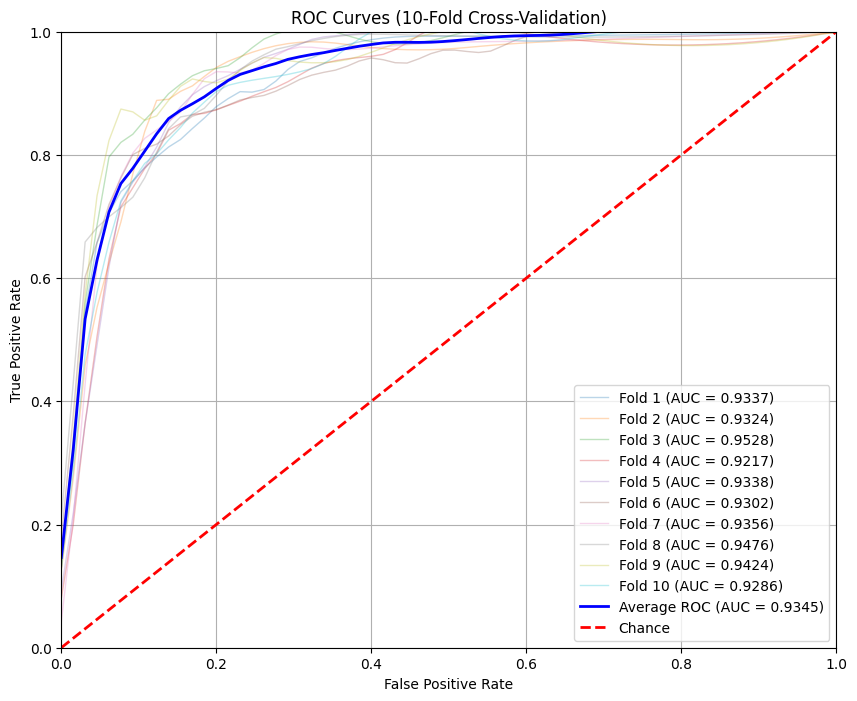

In [50]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    for i in range(len(fprs)):
        # 确保FPR从0到1
        if fprs[i][0] > 0:
            fprs[i] = np.insert(fprs[i], 0, 0)
            tprs[i] = np.insert(tprs[i], 0, 0)
        if fprs[i][-1] < 1:
            fprs[i] = np.append(fprs[i], 1)
            tprs[i] = np.append(tprs[i], 1)

        # 限制TPR范围
        tprs[i] = np.clip(tprs[i], 0, 1)

    max_len = max(len(fpr) for fpr in fprs)
    fpr_new = np.linspace(0, 1, max_len)

    for i in range(len(fprs)):
        roc_auc = auc(fprs[i], tprs[i])

        # 去除FPR重复值
        unique_fpr, unique_indices = np.unique(fprs[i], return_index=True)
        unique_tpr = tprs[i][unique_indices]

        # **修改：使用线性插值，避免振荡**
        f = interp1d(unique_fpr, unique_tpr, kind='linear', fill_value="extrapolate")
        tpr_new = f(fpr_new)

        window_size = max(3, len(tpr_new) // 50)
        tpr_smooth = moving_average(tpr_new, window_size)

        # **修改：限制TPR在0-1之间**
        tpr_smooth = np.clip(tpr_smooth, 0, 1)

        plt.plot(fpr_new, tpr_smooth, lw=0.8, alpha=0.5, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

    average_roc_auc = auc(average_fpr, average_tpr)

    unique_avg_fpr, unique_avg_indices = np.unique(average_fpr, return_index=True)
    unique_avg_tpr = average_tpr[unique_avg_indices]

    f_avg = interp1d(unique_avg_fpr, unique_avg_tpr, kind='linear', fill_value="extrapolate")
    tpr_avg_new = f_avg(fpr_new)
    tpr_avg_smooth = moving_average(tpr_avg_new, window_size)

    # **修改：限制TPR在0-1之间**
    tpr_avg_smooth = np.clip(tpr_avg_smooth, 0, 1)

    plt.plot(fpr_new, tpr_avg_smooth, color='blue', lw=3, label=f'Average ROC (AUC = {average_roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(False)

    plt.savefig('perfect_roc_no_grid.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

def moving_average(data, window_size):
    if len(data) < window_size:
        return data
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')



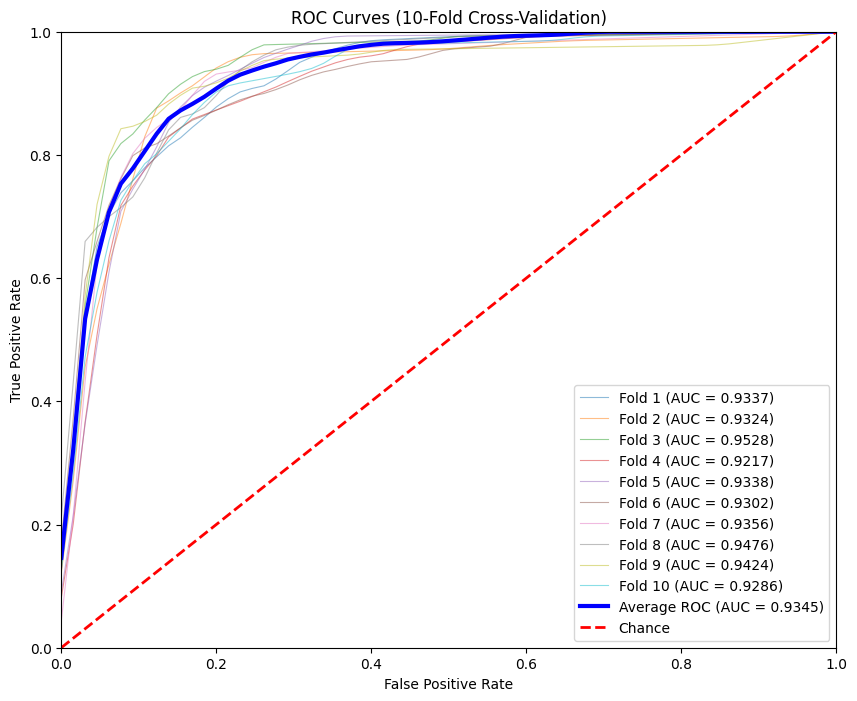

In [58]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def moving_average(data, window_size):
    """ 使用移动平均平滑数据 """
    if len(data) < window_size:
        return data  # 数据太短，不进行平滑
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')

def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    all_fpr_tpr = {}  # 用于存储所有折的数据
    max_len = max(len(fpr) for fpr in fprs)  # 获取最长的 FPR 长度
    fpr_new = np.linspace(0, 1, max_len)  # 生成统一的 FPR 轴

    # 遍历每一折，进行插值和平滑
    for i in range(len(fprs)):
        roc_auc = auc(fprs[i], tprs[i])
        
        # 确保 FPR 具有唯一值
        unique_fpr, unique_indices = np.unique(fprs[i], return_index=True)
        unique_tpr = tprs[i][unique_indices]

        # 进行线性插值
        f = interp1d(unique_fpr, unique_tpr, kind='linear', fill_value="extrapolate")
        tpr_new = f(fpr_new)

        # 进行移动平均平滑
        window_size = max(3, len(tpr_new) // 50)
        tpr_smooth = moving_average(tpr_new, window_size)
        tpr_smooth = np.clip(tpr_smooth, 0, 1)  # 限制 TPR 范围

        # 绘制曲线
        plt.plot(fpr_new, tpr_smooth, lw=0.8, alpha=0.5, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

        # **存储数据**
        all_fpr_tpr[f'Fold_{i+1}_FPR'] = fpr_new
        all_fpr_tpr[f'Fold_{i+1}_TPR'] = tpr_smooth

    # 处理平均 ROC 曲线
    average_roc_auc = auc(average_fpr, average_tpr)
    unique_avg_fpr, unique_avg_indices = np.unique(average_fpr, return_index=True)
    unique_avg_tpr = average_tpr[unique_avg_indices]

    f_avg = interp1d(unique_avg_fpr, unique_avg_tpr, kind='linear', fill_value="extrapolate")
    tpr_avg_new = f_avg(fpr_new)
    tpr_avg_smooth = moving_average(tpr_avg_new, window_size)
    tpr_avg_smooth = np.clip(tpr_avg_smooth, 0, 1)  # 限制 TPR 范围

    # 绘制平均 ROC 曲线
    plt.plot(fpr_new, tpr_avg_smooth, color='blue', lw=3, label=f'Average ROC (AUC = {average_roc_auc:.4f})')

    # 绘制随机参考线
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

    # **设置图形参数**
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(False)  # 取消网格

    # **保存图像**
    plt.savefig('perfect_roc_no_grid.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    # **保存所有 FPR 和 TPR 到 CSV**
    all_fpr_tpr['Average_FPR'] = fpr_new
    all_fpr_tpr['Average_TPR'] = tpr_avg_smooth

    df_fpr_tpr = pd.DataFrame(all_fpr_tpr)
    df_fpr_tpr.to_csv("fpr_tpr_per_fold_with_average.csv", index=False)
    print("✅ FPR 和 TPR 已保存到 fpr_tpr_per_fold_with_average.csv")



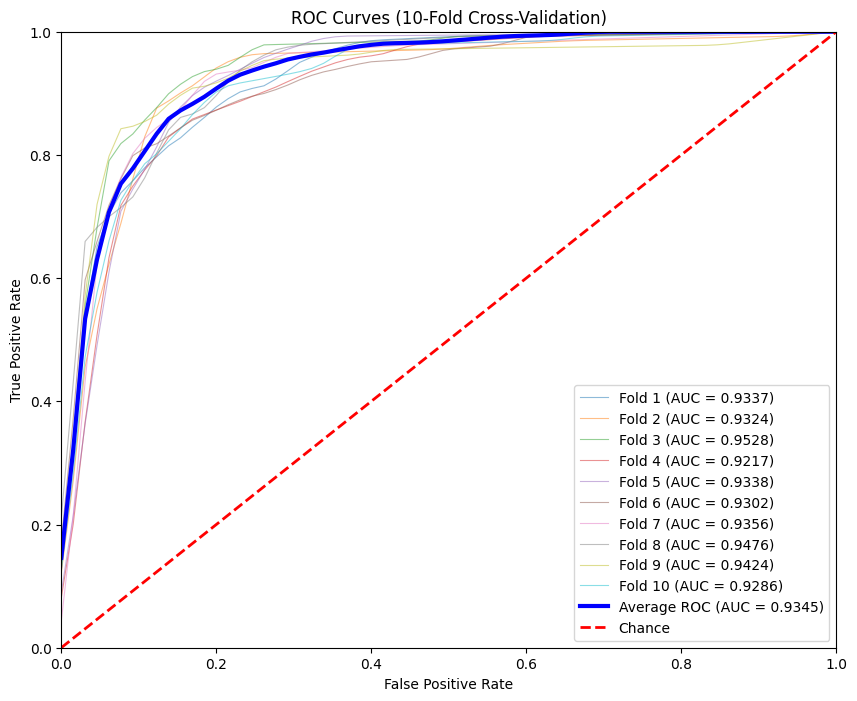

✅ FPR 和 TPR 已保存到 fpr_tpr_per_fold_with_average.csv


In [62]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)